In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [50]:
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [51]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [52]:
df['Gender'] = df['Gender'].replace(np.nan, 0)
df['Gender'] = df['Gender'].replace({'Male': 2, 'Female': 1})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,2,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,2,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,2,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,2,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,2,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,2,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,2,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,2,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [53]:
df['Married'] = df['Married'].replace({'Yes' : 1, 'No' : 0})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,2,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,2,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,2,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,2,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,2,1.0,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,2,1.0,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,2,1.0,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,2,1.0,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,2,1.0,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [54]:
df['Education'] = df['Education'].replace('Graduate', 1 )
df['Education'] = df['Education'].replace('Not Graduate', 0 )
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,2,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,2,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,2,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,2,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,2,1.0,2,1,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,2,1.0,0,0,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,2,1.0,3+,1,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,2,1.0,2,1,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,2,1.0,1,1,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [55]:
df['Self_Employed'] = df['Self_Employed'].fillna(0)
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 2, 'No': 1})

In [56]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,1,1,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,2,1.0,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,2,1.0,0,1,2,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,2,1.0,0,0,1,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,2,0.0,0,1,1,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,2,1.0,2,1,2,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,2,1.0,0,0,1,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,2,1.0,3+,1,1,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,2,1.0,2,1,1,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,2,1.0,1,1,1,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [57]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].replace(0.0, np.mean(df['CoapplicantIncome']))
df['LoanAmount'] = df['LoanAmount'].fillna(0.0)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))
df['Credit_History'] = df['Credit_History'].fillna(np.mean(df['Credit_History']))
df['Property_Area'] = df['Property_Area'].replace('Semiurban', 1)
df['Property_Area'] = df['Property_Area'].replace({'Rural':2, 'Urban':1})


In [58]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,1,1,5849,1621.245798,0.0,360.0,1.000000,1,1
1,LP001003,2,1.0,1,1,1,4583,1508.000000,128.0,360.0,1.000000,2,0
2,LP001005,2,1.0,0,1,2,3000,1621.245798,66.0,360.0,1.000000,1,1
3,LP001006,2,1.0,0,0,1,2583,2358.000000,120.0,360.0,1.000000,1,1
4,LP001008,2,0.0,0,1,1,6000,1621.245798,141.0,360.0,1.000000,1,1
5,LP001011,2,1.0,2,1,2,5417,4196.000000,267.0,360.0,1.000000,1,1
6,LP001013,2,1.0,0,0,1,2333,1516.000000,95.0,360.0,1.000000,1,1
7,LP001014,2,1.0,3+,1,1,3036,2504.000000,158.0,360.0,0.000000,1,0
8,LP001018,2,1.0,2,1,1,4006,1526.000000,168.0,360.0,1.000000,1,1
9,LP001020,2,1.0,1,1,1,12841,10968.000000,349.0,360.0,1.000000,1,0


In [59]:
df['Dependents'] = df['Dependents'].replace(np.nan, 0)
df['Dependents'] = df['Dependents'].replace('3+', 3)

In [60]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,1,1,5849,1621.245798,0.0,360.0,1.000000,1,1
1,LP001003,2,1.0,1,1,1,4583,1508.000000,128.0,360.0,1.000000,2,0
2,LP001005,2,1.0,0,1,2,3000,1621.245798,66.0,360.0,1.000000,1,1
3,LP001006,2,1.0,0,0,1,2583,2358.000000,120.0,360.0,1.000000,1,1
4,LP001008,2,0.0,0,1,1,6000,1621.245798,141.0,360.0,1.000000,1,1
5,LP001011,2,1.0,2,1,2,5417,4196.000000,267.0,360.0,1.000000,1,1
6,LP001013,2,1.0,0,0,1,2333,1516.000000,95.0,360.0,1.000000,1,1
7,LP001014,2,1.0,3,1,1,3036,2504.000000,158.0,360.0,0.000000,1,0
8,LP001018,2,1.0,2,1,1,4006,1526.000000,168.0,360.0,1.000000,1,1
9,LP001020,2,1.0,1,1,1,12841,10968.000000,349.0,360.0,1.000000,1,0


In [61]:
y = df['LoanAmount']
y

0        0.0
1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
6       95.0
7      158.0
8      168.0
9      349.0
10      70.0
11     109.0
12     200.0
13     114.0
14      17.0
15     125.0
16     100.0
17      76.0
18     133.0
19     115.0
20     104.0
21     315.0
22     116.0
23     112.0
24     151.0
25     191.0
26     122.0
27     110.0
28      35.0
29     120.0
       ...  
584    146.0
585    172.0
586    104.0
587     70.0
588     94.0
589    106.0
590     56.0
591    205.0
592    292.0
593    142.0
594    260.0
595    110.0
596    187.0
597     88.0
598    180.0
599    192.0
600    350.0
601    155.0
602    128.0
603    172.0
604    496.0
605      0.0
606    173.0
607    157.0
608    108.0
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [62]:
le = LabelEncoder()
df['CoapplicantIncome'] = le.fit_transform(df['CoapplicantIncome'])
df['Credit_History'] = le.fit_transform(df['Credit_History'])


In [63]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0.0,0,1,1,5849,71,0.0,360.0,2,1,1
1,LP001003,2,1.0,1,1,1,4583,59,128.0,360.0,2,2,0
2,LP001005,2,1.0,0,1,2,3000,71,66.0,360.0,2,1,1
3,LP001006,2,1.0,0,0,1,2583,160,120.0,360.0,2,1,1
4,LP001008,2,0.0,0,1,1,6000,71,141.0,360.0,2,1,1
5,LP001011,2,1.0,2,1,2,5417,241,267.0,360.0,2,1,1
6,LP001013,2,1.0,0,0,1,2333,60,95.0,360.0,2,1,1
7,LP001014,2,1.0,3,1,1,3036,174,158.0,360.0,0,1,0
8,LP001018,2,1.0,2,1,1,4006,62,168.0,360.0,2,1,1
9,LP001020,2,1.0,1,1,1,12841,282,349.0,360.0,2,1,0


In [64]:
df['Loan_ID'] = le.fit_transform(df['Loan_ID'])

In [65]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,2,0.0,0,1,1,5849,71,0.0,360.0,2,1,1
1,1,2,1.0,1,1,1,4583,59,128.0,360.0,2,2,0
2,2,2,1.0,0,1,2,3000,71,66.0,360.0,2,1,1
3,3,2,1.0,0,0,1,2583,160,120.0,360.0,2,1,1
4,4,2,0.0,0,1,1,6000,71,141.0,360.0,2,1,1
5,5,2,1.0,2,1,2,5417,241,267.0,360.0,2,1,1
6,6,2,1.0,0,0,1,2333,60,95.0,360.0,2,1,1
7,7,2,1.0,3,1,1,3036,174,158.0,360.0,0,1,0
8,8,2,1.0,2,1,1,4006,62,168.0,360.0,2,1,1
9,9,2,1.0,1,1,1,12841,282,349.0,360.0,2,1,0


In [68]:
X = df.iloc[ : , df.columns != 'LoanAmount']

In [69]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,2,0.0,0,1,1,5849,71,360.0,2,1,1
1,1,2,1.0,1,1,1,4583,59,360.0,2,2,0
2,2,2,1.0,0,1,2,3000,71,360.0,2,1,1
3,3,2,1.0,0,0,1,2583,160,360.0,2,1,1
4,4,2,0.0,0,1,1,6000,71,360.0,2,1,1
5,5,2,1.0,2,1,2,5417,241,360.0,2,1,1
6,6,2,1.0,0,0,1,2333,60,360.0,2,1,1
7,7,2,1.0,3,1,1,3036,174,360.0,0,1,0
8,8,2,1.0,2,1,1,4006,62,360.0,2,1,1
9,9,2,1.0,1,1,1,12841,282,360.0,2,1,0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [77]:
X.Loan_Amount_Term.unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [78]:
X['Loan_Amount_Term'] = le.fit_transform(X['Loan_Amount_Term'])
X['ApplicantIncome'] = le.fit_transform(X['ApplicantIncome'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [79]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,2,0.0,0,1,1,376,71,9,2,1,1
1,1,2,1.0,1,1,1,306,59,9,2,2,0
2,2,2,1.0,0,1,2,139,71,9,2,1,1
3,3,2,1.0,0,0,1,90,160,9,2,1,1
4,4,2,0.0,0,1,1,381,71,9,2,1,1
5,5,2,1.0,2,1,2,353,241,9,2,1,1
6,6,2,1.0,0,0,1,65,60,9,2,1,1
7,7,2,1.0,3,1,1,146,174,9,0,1,0
8,8,2,1.0,2,1,1,269,62,9,2,1,1
9,9,2,1.0,1,1,1,470,282,9,2,1,0


In [80]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test = st_x.transform(X_test)

In [82]:
from sklearn.preprocessing import Imputer

In [83]:
imp = Imputer(missing_values = np.nan, strategy = 'mean')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [85]:
X_new = imp.fit_transform(X)

In [86]:
X_new

array([[  0.,   2.,   0., ...,   2.,   1.,   1.],
       [  1.,   2.,   1., ...,   2.,   2.,   0.],
       [  2.,   2.,   1., ...,   2.,   1.,   1.],
       ...,
       [611.,   2.,   1., ...,   2.,   1.,   1.],
       [612.,   2.,   1., ...,   2.,   1.,   1.],
       [613.,   1.,   0., ...,   0.,   1.,   0.]])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2)

In [162]:
len(X_train)

491

In [163]:
len(X_test)

123

In [91]:
rf = RandomForestClassifier(n_estimators = 40, criterion = 'entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
rf.score(X_test, y_test)

0.008130081300813009

In [100]:
rf.predict([[15,	2,	0.0,	0,	1,	1,	337,	71,	9,	1,	1, 0]])

array([255.])

In [103]:
regRidge = Ridge()
regRidge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [105]:
regRidge.score(X_test, y_test)

0.21891405318265333

In [107]:
from sklearn.linear_model import Lasso

In [109]:
regLasso = Lasso()
regLasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [146]:
regLasso.score(X_test, y_test)

0.23631094949207532

In [175]:
y_pred = regLasso.predict(X_test)
y_pred

array([102.42231133,  90.62808737, 239.65612598, 121.11637385,
       171.35857598, 109.68863766, 135.76466904,  50.29460239,
        52.82402472, 219.88900532, 193.4992998 , 101.17263589,
       143.97927438, 232.97238877,  93.7246084 , 202.09487638,
       169.32521319,  66.61165949,  83.59901795, 171.70745127,
       112.85355277, 181.9154141 , 170.36940971, 115.97939493,
       171.63954023, 184.86794464, 160.0465751 , 140.83694682,
       161.6687152 , 177.12195132, 102.70509622, 103.58676469,
       181.68213817, 233.27135987, 137.45576429, 195.24848939,
       147.04363053, 147.92619503, 132.25346459, 131.72996436,
       160.28719576,  78.69987822, 109.74022892,  88.40163129,
       123.77912967, 173.38728857, 182.76369795,  67.35574299,
       180.83698043, 185.2199097 , 159.73068674,  92.43136146,
       159.25963433,  59.97463059, 129.6793808 ,  86.10173991,
       145.18663342, 186.10090605,  60.65731456, 121.04782098,
       101.41465343, 178.99163124, 251.67081   , 153.74

In [165]:
len(y_test)

123

In [183]:
y_test = y_test.reshape(-1,1)

In [173]:
X_test.shape

(123, 12)

In [166]:
y_test = np.array(y_test)

In [169]:
y_test

array([ 45., 167., 360., 131., 152., 137., 132.,  53.,  60., 175., 250.,
       110., 103., 187., 113., 150., 218.,  60., 120., 280.,  96., 207.,
       155., 125., 158., 151.,  83., 120.,   0., 228., 143., 100., 405.,
       236., 168., 180., 140., 132., 136.,  95., 128., 108., 122.,   0.,
       186., 151.,  72., 145., 242., 234., 110., 112.,  44.,  94., 158.,
        95., 112., 436., 104.,  96., 150., 150., 160., 134., 140.,  46.,
       115., 160., 138., 107., 130., 120., 110.,  80., 600., 110., 110.,
       118., 128., 112.,  70.,   0., 349., 108., 187., 108.,  50., 125.,
       170., 153., 131., 150., 133.,  88., 180., 201., 168., 135., 320.,
        55.,   0., 170., 175., 304., 175., 650.,  99., 308., 130.,  90.,
       104., 200.,  54., 138., 225., 300., 110., 187., 135., 160., 480.,
       260., 144.])

In [112]:
from sklearn.linear_model import LogisticRegression

In [116]:
lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto')
lr.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
lr.score(X_test, y_test)

0.024390243902439025

In [118]:
from sklearn.svm import SVC

In [125]:
sv = SVC(gamma = 'auto')
sv.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [126]:
sv.score(X_test, y_test)

0.032520325203252036

Text(0, 0.5, 'y_pred')

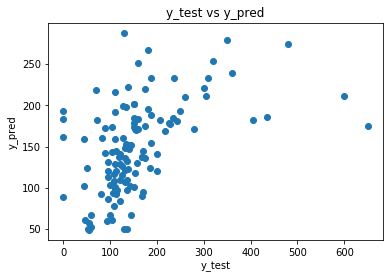

In [190]:
plt.scatter(y_test, y_pred)

plt.title('y_test vs y_pred')

plt.xlabel('y_test')
plt.ylabel('y_pred')
